### Perceptron trick

The perceptron trick, also known as the perceptron learning algorithm, is a simple algorithm used to train a perceptron model for binary classification tasks. It was proposed by Frank Rosenblatt in the late 1950s and is one of the earliest examples of a machine learning algorithm.

The perceptron trick is based on the idea of adjusting the weights of the perceptron iteratively to minimize classification errors. Here's a simplified version of how it works:

1. **Initialization**: Start by initializing the weights vector and the bias term to small random values or zeros.

2. **Training Iterations**: Iterate through the training data points repeatedly until convergence or a predefined number of iterations.
   
3. **Prediction**: For each data point, calculate the predicted output using the current weights and bias term.

4. **Update Weights**: If the predicted output does not match the actual output, update the weights and bias term according to the perceptron update rule:

$${New Weight} = \text{Old Weight} + \text{Learning Rate} \times (\text{Actual Output} - \text{Predicted Output}) \times \text{Input Features}$$

   where the learning rate controls the step size of weight updates.

5. **Repeat**: Continue iterating through the data points and updating the weights until convergence or until a maximum number of iterations is reached.

The perceptron trick is based on the concept of stochastic gradient descent, where the weights are adjusted incrementally after processing each training example. It aims to find a set of weights that can correctly classify the training data by minimizing the classification error.

It's important to note that the perceptron trick has limitations. It can only learn linear decision boundaries and is only guaranteed to converge if the data is linearly separable. However, it serves as the basis for more complex neural network algorithms and has historical significance in the development of machine learning algorithms.

### How to Train Perceptron

Training a perceptron involves iteratively adjusting its weights based on the input data and the desired outputs. Here's a step-by-step guide on how to train a perceptron:

1. **Initialize Weights**: Start by initializing the weights for each input feature. This could be done randomly or set to initial values, such as zeros or small random numbers.

2. **Input Data**: Prepare your input data for training. Each data point should be represented as a feature vector, where each feature corresponds to one input node in the perceptron.

3. **Define Learning Rate**: Choose a learning rate (often denoted as $\( \eta \))$, which determines the step size of weight updates during training. The learning rate is typically a small positive value.

4. **Iterative Training**:
   - Iterate over the training dataset multiple times or until convergence. For each iteration:
   
   - Shuffle the training data to introduce randomness (optional but recommended).
   
   - For each data point $\( \mathbf{x}_i \)$ in the training set:
   
     - Compute the predicted output $\( \hat{y}_i \)$ using the current weights and the perceptron's activation function.
     
     - Update the weights based on the difference between the predicted output $\( \hat{y}_i \)$ and the true output $\( y_i \)$, using the perceptron learning rule:
       $\[ \Delta w_j = \eta \times (y_i - \hat{y}_i) \times x_{ij} \]$
       Where:
       - $\( \Delta w_j \)$ is the change in weight for the $\( j^{th} \)$ input feature.
       - $\( \eta \)$ is the learning rate.
       - $\( y_i \)$ is the true output for the $\( i^{th} \)$ data point.
       - $\( \hat{y}_i \)$ is the predicted output for the $\( i^{th} \)$ data point.
       - $\( x_{ij} \)$ is the value of the $\( j^{th} \)$ input feature for the $\( i^{th} \)$ data point.
       
     - Update the weights using the computed weight changes:
       $\[ w_j = w_j + \Delta w_j \]$
       for all $\( j \)$ input features.

5. **Repeat Training**: Continue iterating over the training dataset and updating the weights until convergence or a maximum number of iterations is reached. Convergence is typically determined when the classification error on the training set stabilizes or falls below a certain threshold.

6. **Validation**: After training, evaluate the performance of the trained perceptron on a separate validation dataset to assess its generalization ability and detect overfitting.

7. **Deployment**: Once trained and validated, the perceptron can be used to make predictions on new, unseen data by computing the weighted sum of input features and passing it through the activation function to obtain the predicted output.

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

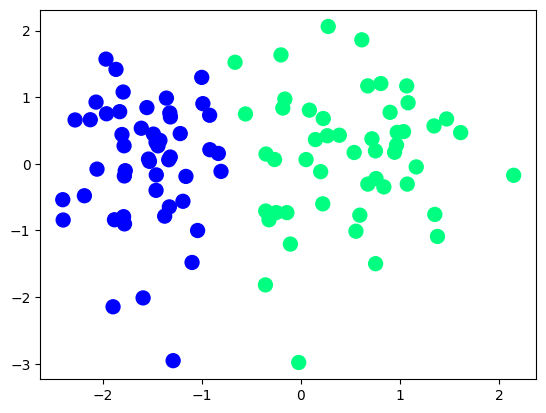

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [3]:
def perceptron(X,y):
    #for bias
    X = np.insert(X,0,1,axis=1)
    #initial weight
    weights = np.ones(X.shape[1])
    #learning rate
    lr = 0.1
    
    for i in range(1000):
        #picking random row
        j = np.random.randint(0,100)
        #prediction
        y_hat = step(np.dot(X[j],weights))
        #updating weights
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

This code defines a function called `perceptron` that implements a simple perceptron learning algorithm for binary classification. Here's a step-by-step explanation of the code:

1. **Input Parameters**: 
   - `X`: Input features, represented as a 2D NumPy array where each row corresponds to a data point and each column corresponds to a feature.
   - `y`: Binary class labels corresponding to the input features.

2. **Insert Bias Term**: 
   - `X = np.insert(X, 0, 1, axis=1)`: This line inserts a bias term (constant feature with value 1) into the input features. This is done by adding a column of 1's at the beginning of the feature matrix. This bias term helps the model learn a bias or intercept term.

3. **Initialize Weights**:
   - `weights = np.ones(X.shape[1])`: This line initializes the weights vector with all elements set to 1. The length of the weights vector is equal to the number of features plus one (including the bias term).

4. **Learning Rate**: 
   - `lr = 0.1`: This line sets the learning rate, which determines the step size taken during weight updates. A smaller learning rate results in slower convergence but may improve stability.

5. **Training Loop**:
   - `for i in range(1000)`: This loop iterates 1000 times, which is a fixed number of iterations for training the perceptron.
   - `j = np.random.randint(0,100)`: This line randomly selects an index `j` from the range of data points (0 to 99). This is a stochastic approach to training, where a random data point is chosen for each iteration.
   - `y_hat = step(np.dot(X[j], weights))`: This line calculates the predicted output `y_hat` for the selected data point `X[j]` by taking the dot product of the input features with the weights vector and passing it through the `step` function. The `step` function typically applies a threshold to determine the binary output (0 or 1).
   - `weights = weights + lr * (y[j] - y_hat) * X[j]`: This line updates the weights vector based on the error between the predicted output `y_hat` and the actual output `y[j]`. The update rule is based on the perceptron learning algorithm, where the weights are adjusted proportionally to the input features and the error, scaled by the learning rate.

6. **Return**:
   - `return weights[0], weights[1:]`: This line returns the learned bias term (intercept) and the weights corresponding to the input features, excluding the bias term.

Overall, this code implements a basic perceptron learning algorithm for binary classification tasks. It updates the weights iteratively using stochastic gradient descent with a fixed number of iterations.

In [4]:
def step(z):
    return 1 if z>0 else 0

In [5]:
intercept_, coef_ = perceptron(X,y) 

In [6]:
#w1, w2, w3
coef_

array([1.36969426, 0.04962558])

In [7]:
#w0
intercept_

0.9

In [8]:
# If we have Ax + By + C = 0
# we can convert it to y = mx +b
# where m = -A/B and b = -C/B
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

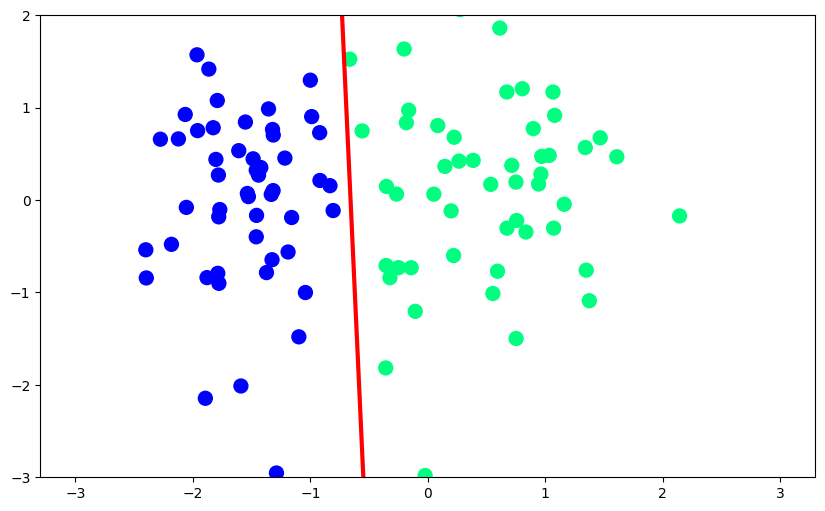

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)